### Packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import importlib, import_ipynb
import data_clean_order_text as data
import tensorflow as tf
from tensorflow.data import experimental
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split, cross_val_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# model building imports
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras.layers import Conv1D, SimpleRNN, Bidirectional, MaxPooling1D, GlobalMaxPool1D, LSTM, GRU
from keras.models import Sequential
from keras.regularizers import L1L2

%matplotlib inline

# matplotlib defaults
plt.style.use("ggplot")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

import warnings 
warnings.filterwarnings('ignore')

importing Jupyter notebook from data_clean_order_text.ipynb
Length of original data set 209527
Number of examples with no short description:  19712
Number of examples with no headline:  6


c:\Users\natal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\natal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\natal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\natal\anacond

Stored 'test_df' (DataFrame)
Size of training data for headlines:  167616
Size of testing data for headlines:  41905
Size of training data for headlines:  151851
Size of testing data for headlines:  37963
Stored 'ordered_super_alpha_text' (DataFrame)
Stored 'ordered_class_alpha_text' (DataFrame)
Stored 'ordered_sem_clusters_desc_text' (DataFrame)
Stored 'ordered_sem_clusters_asc_text' (DataFrame)
Stored 'ordered_sem_clusters_shuffled_per_superclass_text' (DataFrame)


### Loading ordered data from data_clean_order_text.ipynb

In [2]:
%store -r ordered_super_alpha_text
%store -r ordered_class_alpha_text
%store -r ordered_sem_clusters_desc_text
%store -r ordered_sem_clusters_asc_text
%store -r ordered_sem_clusters_shuffled_per_superclass_text
%store -r test_df

In [67]:
# Experimental data orderings on headlines TRAIN EXAMPLES
X1_train = ordered_super_alpha_text['cleaned_headline']
X2_train = ordered_class_alpha_text['cleaned_headline']
X3_train = ordered_sem_clusters_desc_text['cleaned_headline']
X4_train = ordered_sem_clusters_asc_text['cleaned_headline']
X5_train = ordered_sem_clusters_shuffled_per_superclass_text['cleaned_headline']

# TRAIN LABELS
Y1_train = ordered_super_alpha_text['class']
Y2_train = ordered_class_alpha_text['class']
Y3_train = ordered_sem_clusters_desc_text['class']
Y4_train = ordered_sem_clusters_asc_text['class']
Y5_train = ordered_sem_clusters_shuffled_per_superclass_text['class']

# TEST EXAMPLES
X_test = test_df['cleaned_headline']
Y_test = test_df['class']



In [68]:
Y1_train[:100]

0      QUEER VOICES
1             WOMEN
2             WOMEN
3      BLACK VOICES
4      QUEER VOICES
          ...      
95     QUEER VOICES
96     QUEER VOICES
97    LATINO VOICES
98     QUEER VOICES
99    LATINO VOICES
Name: class, Length: 100, dtype: object

In [69]:
Y2_train[:100]

0     ARTS
1     ARTS
2     ARTS
3     ARTS
4     ARTS
      ... 
95    ARTS
96    ARTS
97    ARTS
98    ARTS
99    ARTS
Name: class, Length: 100, dtype: object

In [70]:
Y3_train[:100]

89054     GENERAL POLITICS
36891     GENERAL POLITICS
72404     GENERAL POLITICS
6859      GENERAL POLITICS
27189     GENERAL POLITICS
                ...       
101652    GENERAL POLITICS
68000     GENERAL POLITICS
69019     GENERAL POLITICS
8237      GENERAL POLITICS
65266     GENERAL POLITICS
Name: class, Length: 100, dtype: object

In [71]:
Y4_train[:100]

209514    CULTURE & ARTS
168362    CULTURE & ARTS
206956    CULTURE & ARTS
171094    CULTURE & ARTS
138041    CULTURE & ARTS
               ...      
170438    CULTURE & ARTS
174433    CULTURE & ARTS
175788    CULTURE & ARTS
167105    CULTURE & ARTS
157167    CULTURE & ARTS
Name: class, Length: 100, dtype: object

In [72]:
Y5_train[:100]

35183    THE WORLDPOST
45840    THE WORLDPOST
57787    THE WORLDPOST
62535    THE WORLDPOST
44432    THE WORLDPOST
             ...      
46220    THE WORLDPOST
47155    THE WORLDPOST
62475    THE WORLDPOST
57798    THE WORLDPOST
51993    THE WORLDPOST
Name: class, Length: 100, dtype: object

In [73]:
Y_test[:100]

100952     QUEER VOICES
156276           TRAVEL
129361            CRIME
157804     QUEER VOICES
185209           TRAVEL
              ...      
116817             ARTS
69235           LEISURE
113929          PARENTS
144547          LEISURE
143945    HOME & LIVING
Name: class, Length: 100, dtype: object

## Tokenization and Vectorization


### One-hot encoding and indexing of train and test data

In [74]:
# TEST DATA

# one hot encoding using keras tokenizer and pad sequencing
encoder = LabelEncoder()
Y_test = encoder.fit_transform(Y_test)
print("shape of input data: ", X_test.shape)
print("shape of target variable: ", Y_test.shape)

tokenizer = Tokenizer(num_words=1000000, oov_token='<00V>') 
tokenizer.fit_on_texts(X_test) # build the word index
# padding X_test text input data
test_seq = tokenizer.texts_to_sequences(X_test) # converts strinfs into integer lists
test_padseq = pad_sequences(test_seq, maxlen=20) # pads the integer lists to 2D integer tensor 

word_index = tokenizer.word_index
max_words = 150000000  # total number of words to consider in embedding layer
total_words = len(word_index)
maxlen = 20 # max length of sequence 
Y_test = to_categorical(Y_test, num_classes=42)
print("Length of word index:", total_words)

shape of input data:  (41905,)
shape of target variable:  (41905,)
Length of word index: 27409


# EXPERIMENT ORDER 1

In [78]:
# ORDER 1 TRAIN DATA
X_train = X1_train
Y_train = Y1_train

# one hot encoding using keras tokenizer and pad sequencing
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
print("shape of input data: ", X_train.shape)
print("shape of target variable: ", Y_train.shape)

tokenizer = Tokenizer(num_words=1000000, oov_token='<00V>') 
tokenizer.fit_on_texts(X_train) # build the word index
# padding X_train text input data
train_seq = tokenizer.texts_to_sequences(X_train) # converts strinfs into integer lists
train_padseq = pad_sequences(train_seq, maxlen=20) # pads the integer lists to 2D integer tensor 

word_index = tokenizer.word_index
max_words = 15000000  # total number of words to consider in embedding layer
total_words = len(word_index) + 1000
maxlen = 20 # max length of sequence 
Y_train = to_categorical(Y_train, num_classes=42)
print("Length of word index:", total_words)

shape of input data:  (167616,)
shape of target variable:  (167616,)
Length of word index: 53538


### Model training using embedding layer and RNN (Baseline)

In [79]:
# basline model using embedding layers and simpleRNN
model = Sequential()
model.add(Embedding(total_words, 70, input_length=maxlen))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.30, activation='tanh', return_sequences=True)))
model.add(SimpleRNN(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(42, activation='softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 20, 70)            3747660   
                                                                 
 bidirectional_18 (Bidirecti  (None, 20, 128)          17280     
 onal)                                                           
                                                                 
 bidirectional_19 (Bidirecti  (None, 20, 128)          24704     
 onal)                                                           
                                                                 
 simple_rnn_33 (SimpleRNN)   (None, 32)                5152      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 42)              

In [80]:
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy']
            )
#SETUP A EARLY STOPPING CALL and model check point API
earlystopping = keras.callbacks.EarlyStopping(monitor='accuracy',
                                             patience=5,
                                              verbose=1,
                                              mode='min'
                                             )
checkpointer = ModelCheckpoint(filepath='bestvalue',moniter='val_loss', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]
callback_list = [earlystopping]

# fit model to the data
history = model.fit(train_padseq, Y_train, 
                   batch_size=128, 
                    epochs=15
                   )

Epoch 1/15
1310/1310 [==============================] - 102s 72ms/step - loss: 2.7662 - accuracy: 0.3069
Epoch 2/15
1310/1310 [==============================] - 105s 80ms/step - loss: 2.1611 - accuracy: 0.4439
Epoch 3/15
1310/1310 [==============================] - 110s 84ms/step - loss: 1.9394 - accuracy: 0.4953
Epoch 4/15
1310/1310 [==============================] - 104s 79ms/step - loss: 1.8133 - accuracy: 0.5243
Epoch 5/15
1310/1310 [==============================] - 96s 73ms/step - loss: 1.7155 - accuracy: 0.5482
Epoch 6/15
1310/1310 [==============================] - 105s 80ms/step - loss: 1.6381 - accuracy: 0.5665
Epoch 7/15
1310/1310 [==============================] - 100s 76ms/step - loss: 1.5736 - accuracy: 0.5813
Epoch 8/15
1310/1310 [==============================] - 101s 77ms/step - loss: 1.5154 - accuracy: 0.5972
Epoch 9/15
1310/1310 [==============================] - 97s 74ms/step - loss: 1.4695 - accuracy: 0.6091
Epoch 10/15
1310/1310 [==============================] - 

In [81]:
# evalute the model
test_loss, test_acc = model.evaluate(test_padseq, Y_test, verbose=0)
print("test loss and accuracy:", test_loss, test_acc)

test loss and accuracy: 4.848899841308594 0.10740961879491806


In [90]:
model.evaluate(test_padseq, Y_test, verbose=0)

[4.848899841308594, 0.10740961879491806]

In [88]:
def plot_loss_accuracy(history):

    # create object of arrays of accuracy and loss
    acc = history.history['accuracy']
    #val_acc = history.history['val_acc']
    loss = history.history['loss']
    #val_loss = history.history['val_loss']
    
    # number of epochs in our model
    epochs = range(1 ,len(acc) + 1)
    
    # call matplolib figure object and plot loss and accuracy curves
    plt.figure(figsize=(15,6))
    
    plt.subplot(121)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    #plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title("Training and validation accuracy", fontsize=15)
    plt.xlabel('epochs', fontsize=14)
    plt.ylabel("accuracy", fontsize=14)
    plt.legend()
    
    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    #plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title("Training and validation loss", fontsize=15)
    plt.xlabel('epochs', fontsize=14)
    plt.ylabel("loss", fontsize=14)
    plt.legend()
    
    plt.show()

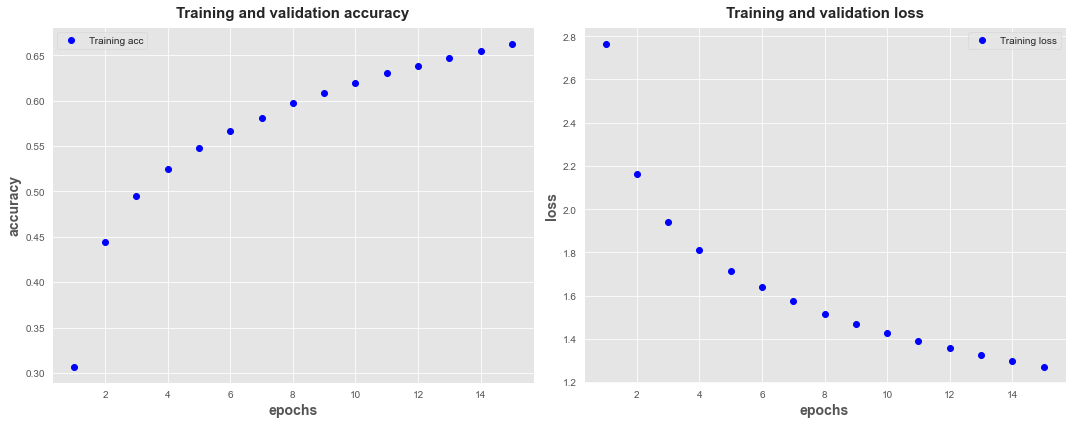

In [89]:
plot_loss_accuracy(history)

# EXPERIMENT ORDER 2

In [91]:
# ORDER 2 TRAIN DATA
X_train = X2_train
Y_train = Y2_train

# one hot encoding using keras tokenizer and pad sequencing
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
print("shape of input data: ", X_train.shape)
print("shape of target variable: ", Y_train.shape)

tokenizer = Tokenizer(num_words=1000000, oov_token='<00V>') 
tokenizer.fit_on_texts(X_train) # build the word index
# padding X_train text input data
train_seq = tokenizer.texts_to_sequences(X_train) # converts strinfs into integer lists
train_padseq = pad_sequences(train_seq, maxlen=20) # pads the integer lists to 2D integer tensor 

word_index = tokenizer.word_index
max_words = 15000000  # total number of words to consider in embedding layer
total_words = len(word_index) + 5000
maxlen = 20 # max length of sequence 
Y_train = to_categorical(Y_train, num_classes=42)
print("Length of word index:", total_words)

shape of input data:  (167616,)
shape of target variable:  (167616,)
Length of word index: 57538


### Model training using embedding layer and RNN (Baseline)

In [92]:
# basline model using embedding layers and simpleRNN
model = Sequential()
model.add(Embedding(total_words, 70, input_length=maxlen))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.30, activation='tanh', return_sequences=True)))
model.add(SimpleRNN(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(42, activation='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 20, 70)            4027660   
                                                                 
 bidirectional_20 (Bidirecti  (None, 20, 128)          17280     
 onal)                                                           
                                                                 
 bidirectional_21 (Bidirecti  (None, 20, 128)          24704     
 onal)                                                           
                                                                 
 simple_rnn_36 (SimpleRNN)   (None, 32)                5152      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 42)              

In [93]:
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy']
            )
#SETUP A EARLY STOPPING CALL and model check point API
earlystopping = keras.callbacks.EarlyStopping(monitor='accuracy',
                                             patience=5,
                                              verbose=1,
                                              mode='min'
                                             )
checkpointer = ModelCheckpoint(filepath='bestvalue',moniter='val_loss', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]
callback_list = [earlystopping]

# fit model to the data
history = model.fit(train_padseq, Y_train, 
                   batch_size=128, 
                    epochs=15
                   )

# evalute the model
test_loss, test_acc = model.evaluate(test_padseq, Y_test, verbose=0)
print("test loss and accuracy:", test_loss, test_acc)

Epoch 1/15
1310/1310 [==============================] - 108s 76ms/step - loss: 2.7223 - accuracy: 0.3208
Epoch 2/15
1310/1310 [==============================] - 101s 77ms/step - loss: 2.1369 - accuracy: 0.4515
Epoch 3/15
1310/1310 [==============================] - 103s 79ms/step - loss: 1.9255 - accuracy: 0.4984
Epoch 4/15
1310/1310 [==============================] - 102s 78ms/step - loss: 1.7893 - accuracy: 0.5293
Epoch 5/15
1310/1310 [==============================] - 103s 78ms/step - loss: 1.6928 - accuracy: 0.5530
Epoch 6/15
1310/1310 [==============================] - 96s 73ms/step - loss: 1.6166 - accuracy: 0.5717
Epoch 7/15
1310/1310 [==============================] - 95s 73ms/step - loss: 1.5549 - accuracy: 0.5867
Epoch 8/15
1310/1310 [==============================] - 99s 75ms/step - loss: 1.4990 - accuracy: 0.6010
Epoch 9/15
1310/1310 [==============================] - 97s 74ms/step - loss: 1.4532 - accuracy: 0.6136
Epoch 10/15
1310/1310 [==============================] - 10

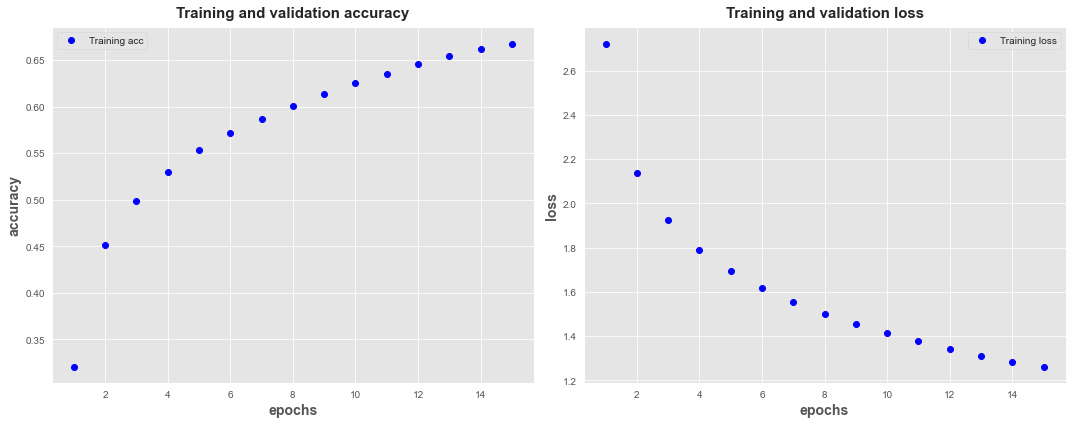

In [94]:
plot_loss_accuracy(history)

# EXPERIMENT ORDER 3

In [95]:
# ORDER 3 TRAIN DATA
X_train = X3_train
Y_train = Y3_train

# one hot encoding using keras tokenizer and pad sequencing
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
print("shape of input data: ", X_train.shape)
print("shape of target variable: ", Y_train.shape)

tokenizer = Tokenizer(num_words=1000000, oov_token='<00V>') 
tokenizer.fit_on_texts(X_train) # build the word index
# padding X_train text input data
train_seq = tokenizer.texts_to_sequences(X_train) # converts strinfs into integer lists
train_padseq = pad_sequences(train_seq, maxlen=20) # pads the integer lists to 2D integer tensor 

word_index = tokenizer.word_index
max_words = 15000000  # total number of words to consider in embedding layer
total_words = len(word_index) + 5000
maxlen = 20 # max length of sequence 
Y_train = to_categorical(Y_train, num_classes=42)
print("Length of word index:", total_words)

shape of input data:  (167616,)
shape of target variable:  (167616,)
Length of word index: 57538


### Model training using embedding layer and RNN (Baseline)

In [96]:
# basline model using embedding layers and simpleRNN
model = Sequential()
model.add(Embedding(total_words, 70, input_length=maxlen))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.30, activation='tanh', return_sequences=True)))
model.add(SimpleRNN(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(42, activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 20, 70)            4027660   
                                                                 
 bidirectional_22 (Bidirecti  (None, 20, 128)          17280     
 onal)                                                           
                                                                 
 bidirectional_23 (Bidirecti  (None, 20, 128)          24704     
 onal)                                                           
                                                                 
 simple_rnn_39 (SimpleRNN)   (None, 32)                5152      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 42)              

In [97]:
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy']
            )
#SETUP A EARLY STOPPING CALL and model check point API
earlystopping = keras.callbacks.EarlyStopping(monitor='accuracy',
                                             patience=5,
                                              verbose=1,
                                              mode='min'
                                             )
checkpointer = ModelCheckpoint(filepath='bestvalue',moniter='val_loss', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]
callback_list = [earlystopping]

# fit model to the data
history = model.fit(train_padseq, Y_train, 
                   batch_size=128, 
                    epochs=15
                   )

# evalute the model
test_loss, test_acc = model.evaluate(test_padseq, Y_test, verbose=0)
print("test loss and accuracy:", test_loss, test_acc)

Epoch 1/15
1310/1310 [==============================] - 104s 73ms/step - loss: 2.7548 - accuracy: 0.3090
Epoch 2/15
1310/1310 [==============================] - 101s 77ms/step - loss: 2.1643 - accuracy: 0.4475
Epoch 3/15
1310/1310 [==============================] - 90s 69ms/step - loss: 1.9278 - accuracy: 0.5027
Epoch 4/15
1310/1310 [==============================] - 90s 69ms/step - loss: 1.7813 - accuracy: 0.5367
Epoch 5/15
1310/1310 [==============================] - 89s 68ms/step - loss: 1.6827 - accuracy: 0.5577
Epoch 6/15
1310/1310 [==============================] - 91s 69ms/step - loss: 1.6043 - accuracy: 0.5762
Epoch 7/15
1310/1310 [==============================] - 93s 71ms/step - loss: 1.5438 - accuracy: 0.5912
Epoch 8/15
1310/1310 [==============================] - 90s 69ms/step - loss: 1.4901 - accuracy: 0.6052
Epoch 9/15
1310/1310 [==============================] - 94s 72ms/step - loss: 1.4438 - accuracy: 0.6165
Epoch 10/15
1310/1310 [==============================] - 94s 7

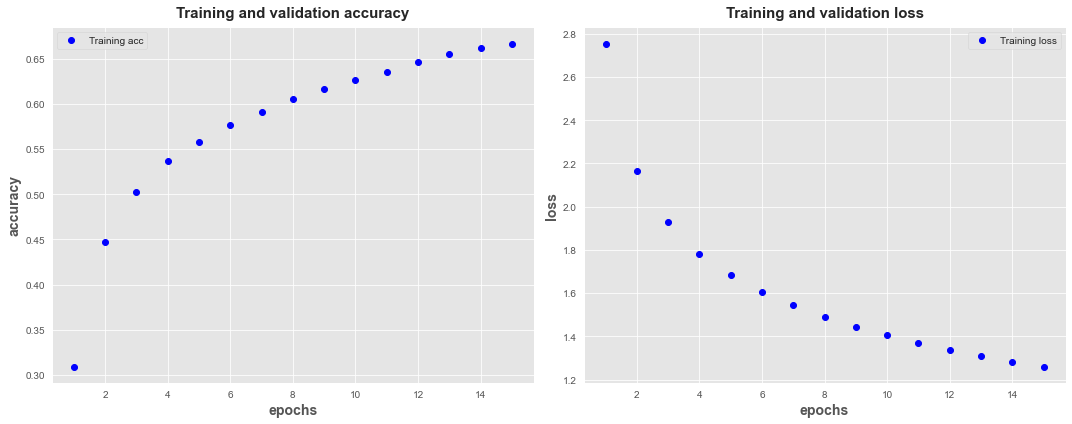

In [98]:
plot_loss_accuracy(history)

# EXPERIMENT ORDER 4

In [99]:
# ORDER 4 TRAIN DATA
X_train = X4_train
Y_train = Y4_train

# one hot encoding using keras tokenizer and pad sequencing
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
print("shape of input data: ", X_train.shape)
print("shape of target variable: ", Y_train.shape)

tokenizer = Tokenizer(num_words=1000000, oov_token='<00V>') 
tokenizer.fit_on_texts(X_train) # build the word index
# padding X_train text input data
train_seq = tokenizer.texts_to_sequences(X_train) # converts strinfs into integer lists
train_padseq = pad_sequences(train_seq, maxlen=20) # pads the integer lists to 2D integer tensor 

word_index = tokenizer.word_index
max_words = 15000000  # total number of words to consider in embedding layer
total_words = len(word_index) + 5000
maxlen = 20 # max length of sequence 
Y_train = to_categorical(Y_train, num_classes=42)
print("Length of word index:", total_words)

shape of input data:  (167616,)
shape of target variable:  (167616,)
Length of word index: 57538


### Model training using embedding layer and RNN (Baseline)

In [100]:
# basline model using embedding layers and simpleRNN
model = Sequential()
model.add(Embedding(total_words, 70, input_length=maxlen))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.30, activation='tanh', return_sequences=True)))
model.add(SimpleRNN(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(42, activation='softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 20, 70)            4027660   
                                                                 
 bidirectional_24 (Bidirecti  (None, 20, 128)          17280     
 onal)                                                           
                                                                 
 bidirectional_25 (Bidirecti  (None, 20, 128)          24704     
 onal)                                                           
                                                                 
 simple_rnn_42 (SimpleRNN)   (None, 32)                5152      
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 42)              

In [101]:
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy']
            )
#SETUP A EARLY STOPPING CALL and model check point API
earlystopping = keras.callbacks.EarlyStopping(monitor='accuracy',
                                             patience=5,
                                              verbose=1,
                                              mode='min'
                                             )
checkpointer = ModelCheckpoint(filepath='bestvalue',moniter='val_loss', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]
callback_list = [earlystopping]

# fit model to the data
history = model.fit(train_padseq, Y_train, 
                   batch_size=128, 
                    epochs=15
                   )

# evalute the model
test_loss, test_acc = model.evaluate(test_padseq, Y_test, verbose=0)
print("test loss and accuracy:", test_loss, test_acc)

Epoch 1/15
1310/1310 [==============================] - 99s 69ms/step - loss: 2.7661 - accuracy: 0.3061
Epoch 2/15
1310/1310 [==============================] - 88s 67ms/step - loss: 2.1677 - accuracy: 0.4457
Epoch 3/15
1310/1310 [==============================] - 88s 67ms/step - loss: 1.9256 - accuracy: 0.4999
Epoch 4/15
1310/1310 [==============================] - 98s 75ms/step - loss: 1.7907 - accuracy: 0.5316
Epoch 5/15
1310/1310 [==============================] - 99s 76ms/step - loss: 1.6983 - accuracy: 0.5514
Epoch 6/15
1310/1310 [==============================] - 103s 79ms/step - loss: 1.6240 - accuracy: 0.5706
Epoch 7/15
1310/1310 [==============================] - 101s 77ms/step - loss: 1.5597 - accuracy: 0.5861
Epoch 8/15
1310/1310 [==============================] - 100s 76ms/step - loss: 1.5013 - accuracy: 0.6014
Epoch 9/15
1310/1310 [==============================] - 99s 76ms/step - loss: 1.4553 - accuracy: 0.6124
Epoch 10/15
1310/1310 [==============================] - 102s

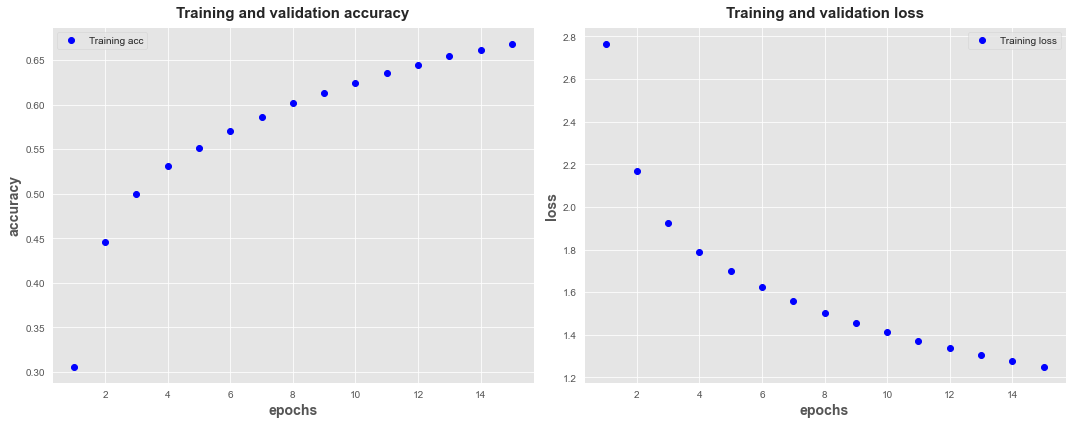

In [102]:
plot_loss_accuracy(history)

# EXPERIMENT ORDER 5

In [103]:
# ORDER 5 TRAIN DATA
X_train = X5_train
Y_train = Y5_train

# one hot encoding using keras tokenizer and pad sequencing
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
print("shape of input data: ", X_train.shape)
print("shape of target variable: ", Y_train.shape)

tokenizer = Tokenizer(num_words=1000000, oov_token='<00V>') 
tokenizer.fit_on_texts(X_train) # build the word index
# padding X_train text input data
train_seq = tokenizer.texts_to_sequences(X_train) # converts strinfs into integer lists
train_padseq = pad_sequences(train_seq, maxlen=20) # pads the integer lists to 2D integer tensor 

word_index = tokenizer.word_index
max_words = 15000000  # total number of words to consider in embedding layer
total_words = len(word_index) + 5000
maxlen = 20 # max length of sequence 
Y_train = to_categorical(Y_train, num_classes=42)
print("Length of word index:", total_words)

shape of input data:  (167616,)
shape of target variable:  (167616,)
Length of word index: 57538


### Model training using embedding layer and RNN (Baseline)

In [104]:
# basline model using embedding layers and simpleRNN
model = Sequential()
model.add(Embedding(total_words, 70, input_length=maxlen))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.30, activation='tanh', return_sequences=True)))
model.add(SimpleRNN(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(42, activation='softmax'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 20, 70)            4027660   
                                                                 
 bidirectional_26 (Bidirecti  (None, 20, 128)          17280     
 onal)                                                           
                                                                 
 bidirectional_27 (Bidirecti  (None, 20, 128)          24704     
 onal)                                                           
                                                                 
 simple_rnn_45 (SimpleRNN)   (None, 32)                5152      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 42)              

In [105]:
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy']
            )
#SETUP A EARLY STOPPING CALL and model check point API
earlystopping = keras.callbacks.EarlyStopping(monitor='accuracy',
                                             patience=5,
                                              verbose=1,
                                              mode='min'
                                             )
checkpointer = ModelCheckpoint(filepath='bestvalue',moniter='val_loss', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]
callback_list = [earlystopping]

# fit model to the data
history = model.fit(train_padseq, Y_train, 
                   batch_size=128, 
                    epochs=15
                   )

# evalute the model
test_loss, test_acc = model.evaluate(test_padseq, Y_test, verbose=0)
print("test loss and accuracy:", test_loss, test_acc)

Epoch 1/15
1310/1310 [==============================] - 138s 94ms/step - loss: 2.8047 - accuracy: 0.2990
Epoch 2/15
1310/1310 [==============================] - 126s 96ms/step - loss: 2.1596 - accuracy: 0.4486
Epoch 3/15
1310/1310 [==============================] - 120s 91ms/step - loss: 1.9169 - accuracy: 0.5009
Epoch 4/15
1310/1310 [==============================] - 127s 97ms/step - loss: 1.7838 - accuracy: 0.5313
Epoch 5/15
1310/1310 [==============================] - 125s 96ms/step - loss: 1.6843 - accuracy: 0.5546
Epoch 6/15
1310/1310 [==============================] - 132s 101ms/step - loss: 1.6110 - accuracy: 0.5719
Epoch 7/15
1310/1310 [==============================] - 130s 99ms/step - loss: 1.5472 - accuracy: 0.5871
Epoch 8/15
1310/1310 [==============================] - 131s 100ms/step - loss: 1.4948 - accuracy: 0.6012
Epoch 9/15
1310/1310 [==============================] - 123s 94ms/step - loss: 1.4439 - accuracy: 0.6143
Epoch 10/15
1310/1310 [==============================

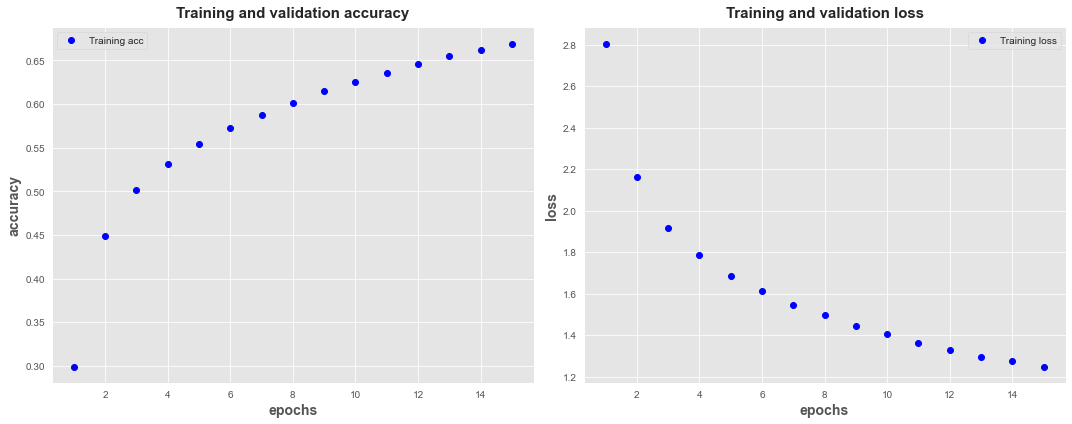

In [106]:
plot_loss_accuracy(history)